<a href="https://colab.research.google.com/github/Teddy539/BigData/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



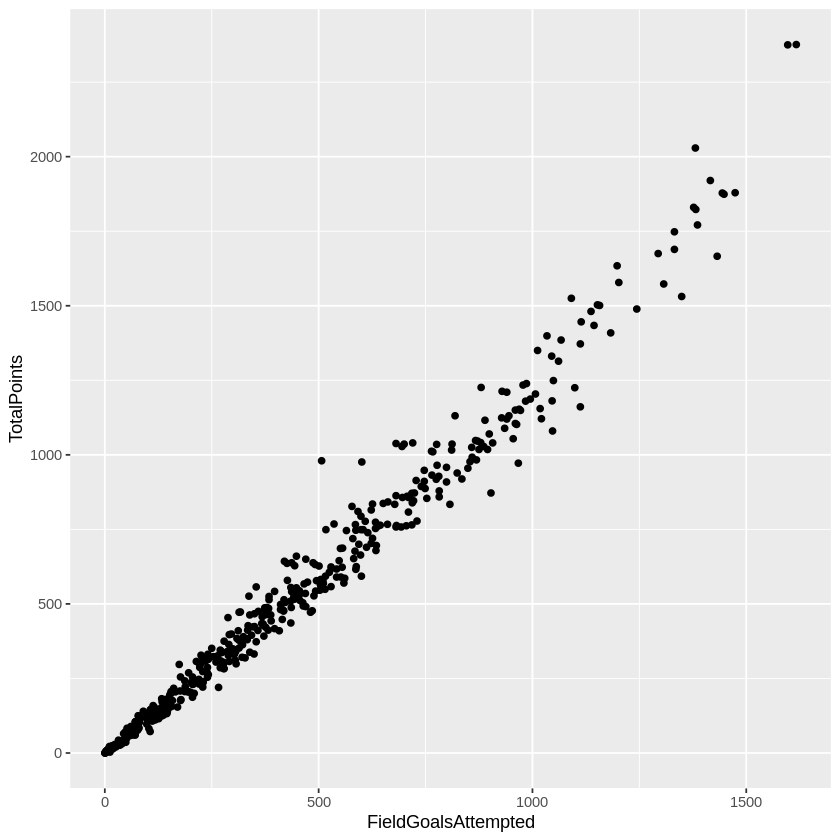

In [4]:
library(SportsAnalytics)
library(ggplot2)

NBA1516<-fetch_NBAPlayerStatistics("15-16")
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516)

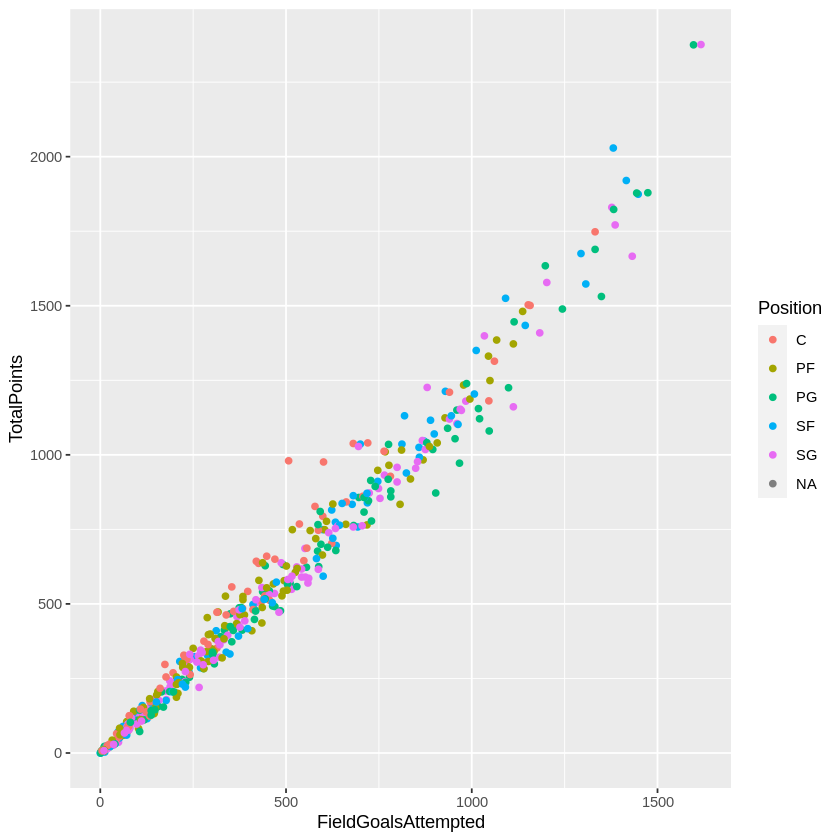

In [6]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,color=Position)

In [8]:
str(NBA1516)

'data.frame':	476 obs. of  25 variables:
 $ League             : Factor w/ 1 level "NBA": 1 1 1 1 1 1 1 1 1 1 ...
 $ Name               : chr  "Quincy Acy" "Jordan Adams" "Steven Adams" "Arron Afflalo" ...
 $ Team               : Factor w/ 31 levels "ATL","BOS","BRO",..: 27 15 22 20 19 13 28 26 12 15 ...
 $ Position           : Factor w/ 5 levels "C","PF","PG",..: 4 5 1 5 1 1 2 2 2 5 ...
 $ GamesPlayed        : int  59 2 80 71 59 60 74 9 79 64 ...
 $ TotalMinutesPlayed : int  877 15 2019 2359 863 802 2260 37 1601 1622 ...
 $ FieldGoalsMade     : int  119 2 261 354 150 134 536 5 191 215 ...
 $ FieldGoalsAttempted: int  214 6 426 799 314 225 1045 10 370 469 ...
 $ ThreesMade         : int  19 0 0 91 0 0 0 0 0 15 ...
 $ ThreesAttempted    : int  49 1 0 238 1 0 16 0 0 42 ...
 $ FreeThrowsMade     : int  50 3 114 110 52 60 259 0 46 90 ...
 $ FreeThrowsAttempted: int  68 5 196 131 62 84 302 0 73 138 ...
 $ OffensiveRebounds  : int  65 0 218 23 75 86 175 2 162 104 ...
 $ TotalRebounds      : 

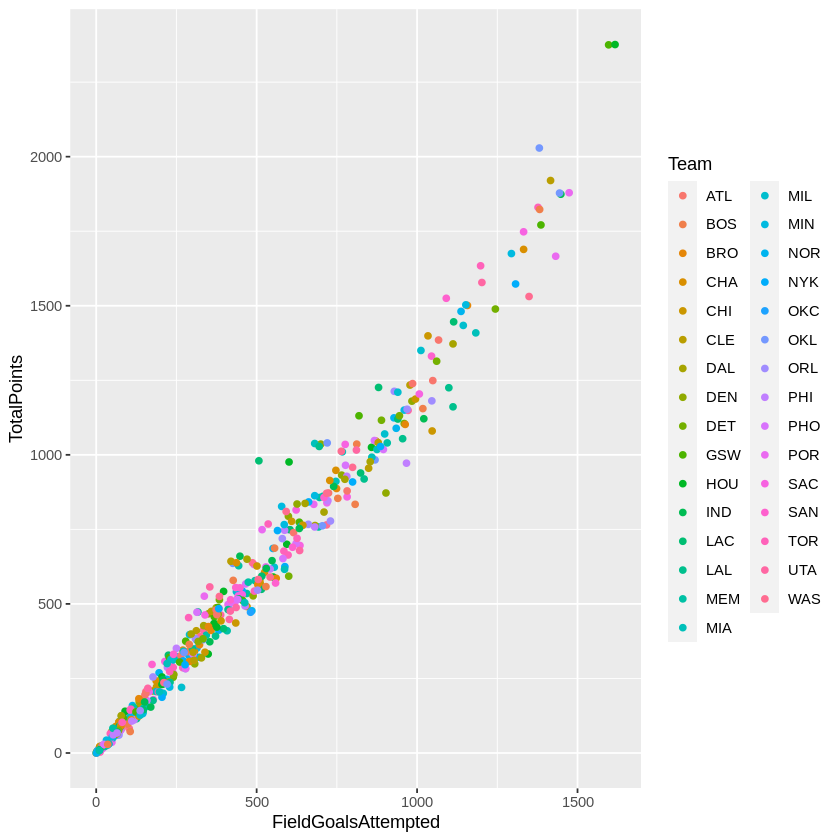

In [10]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,color=Team)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



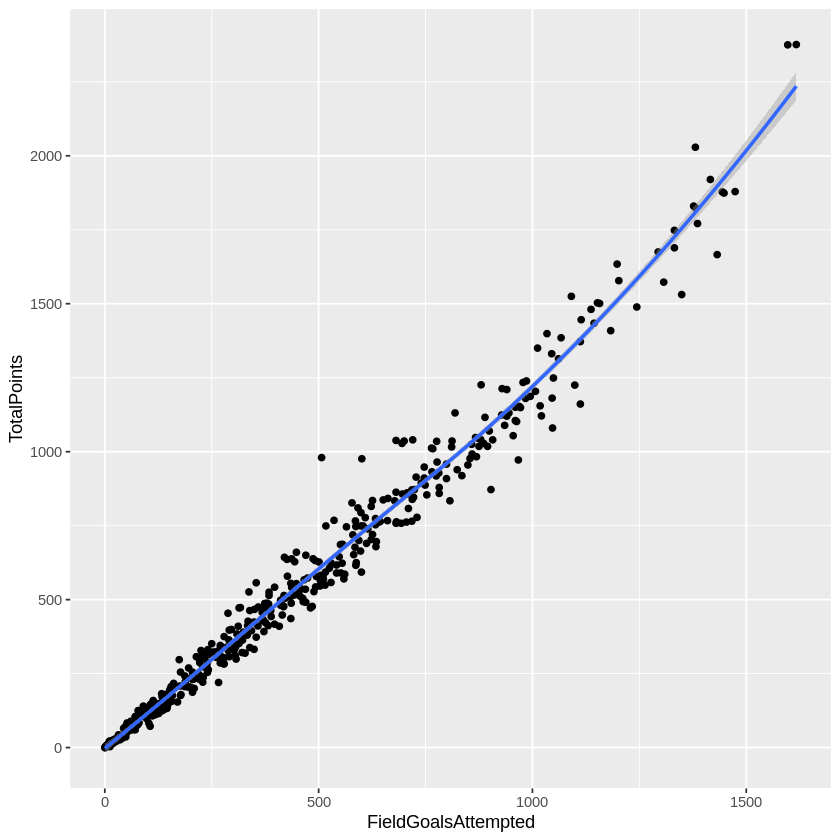

In [13]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,geom=c("point","smooth"))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



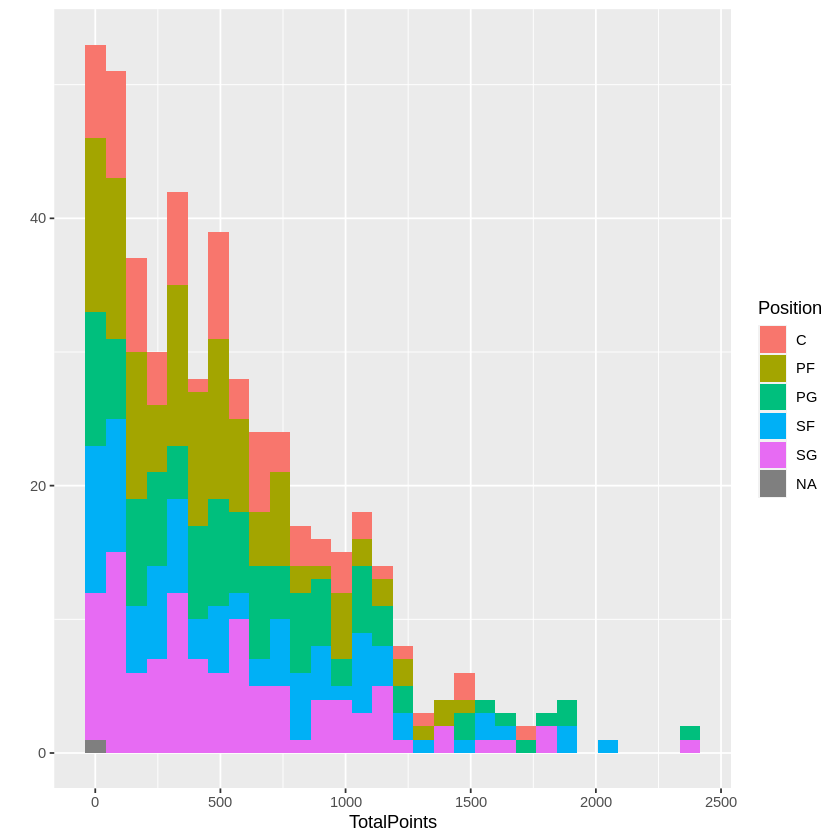

In [15]:
qplot(TotalPoints,data=NBA1516,fill=Position)

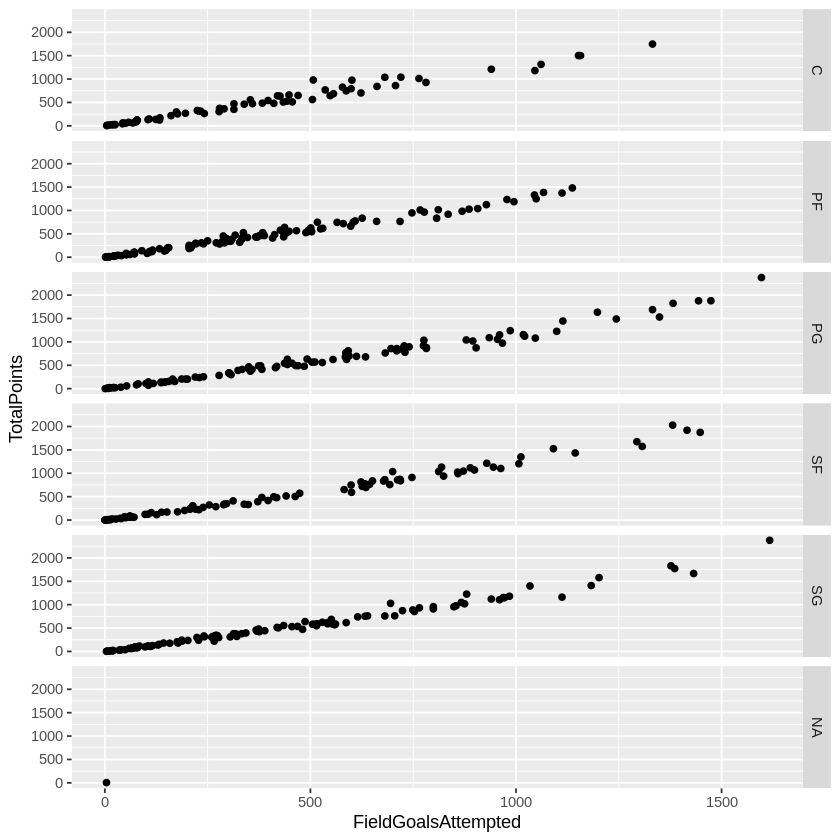

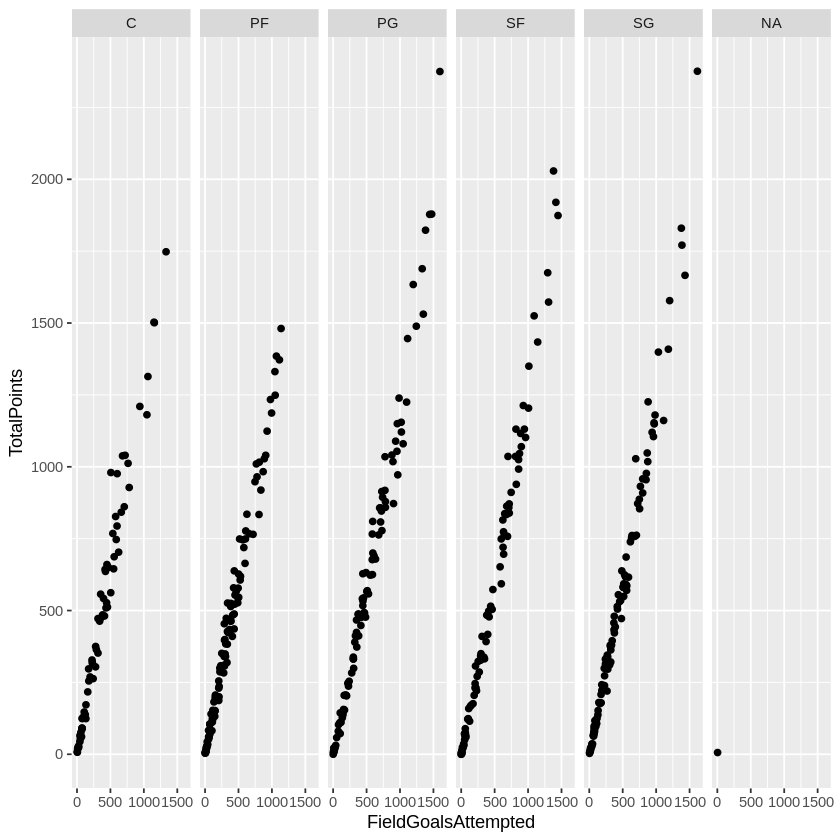

In [18]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=Position~.)
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=.~Position)

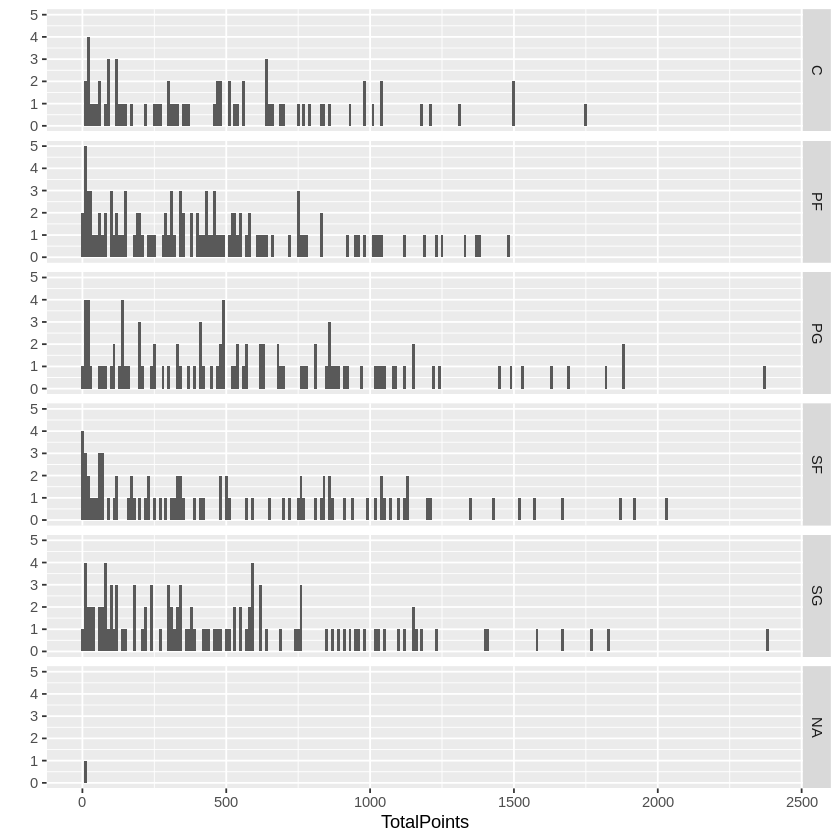

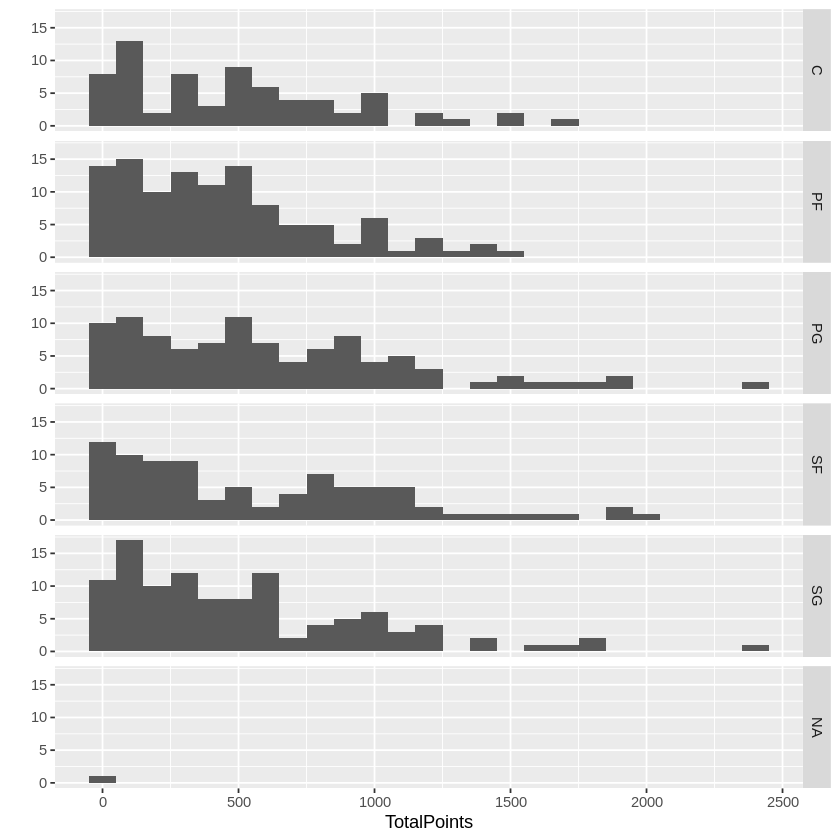

In [21]:
qplot(TotalPoints,data=NBA1516,facets=Position~.,binwidth=10)
qplot(TotalPoints,data=NBA1516,facets=Position~.,binwidth=100)

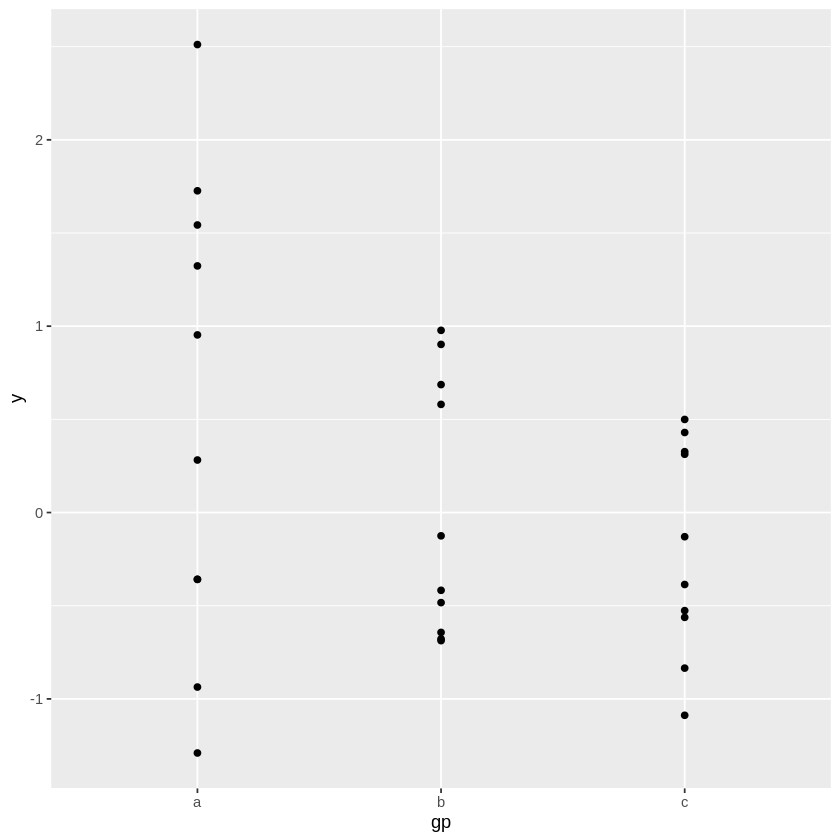

In [23]:
library(ggplot2)
df<-data.frame(gp=factor(rep(letters[1:3],each=10)),y=rnorm(30))
ggplot(df,aes(x=gp,y=y))+geom_point()

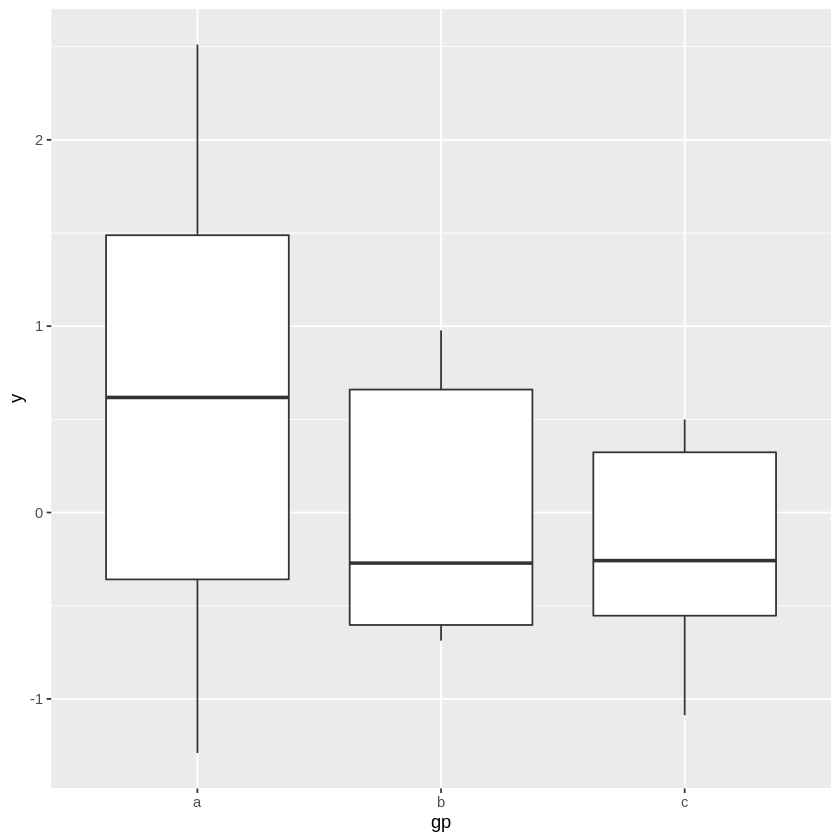

In [25]:
ggplot(df,aes(x=gp,y=y))+geom_boxplot()

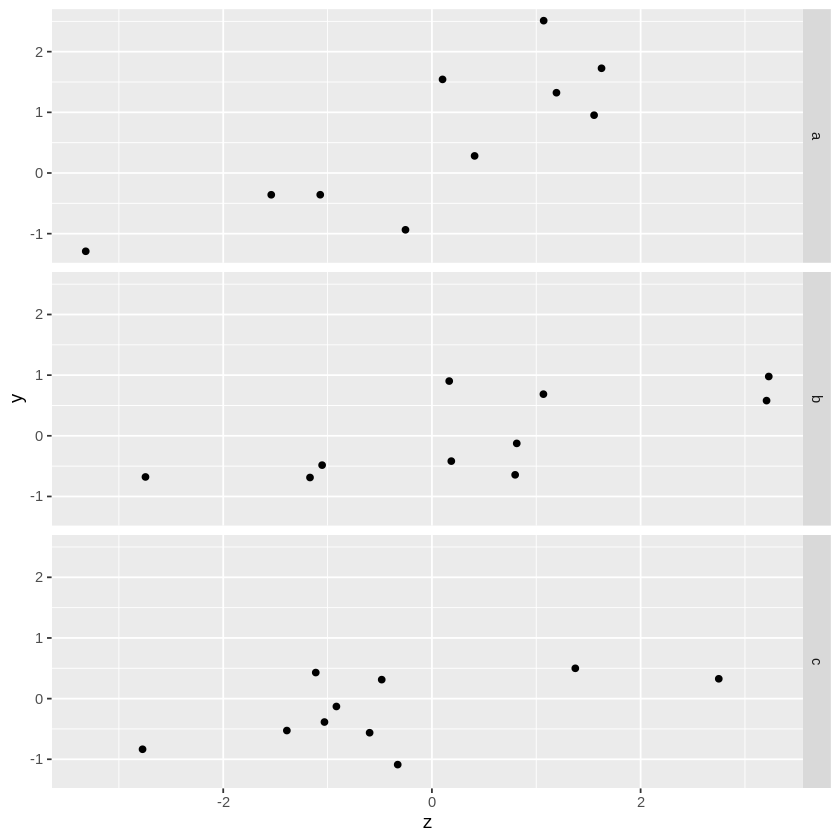

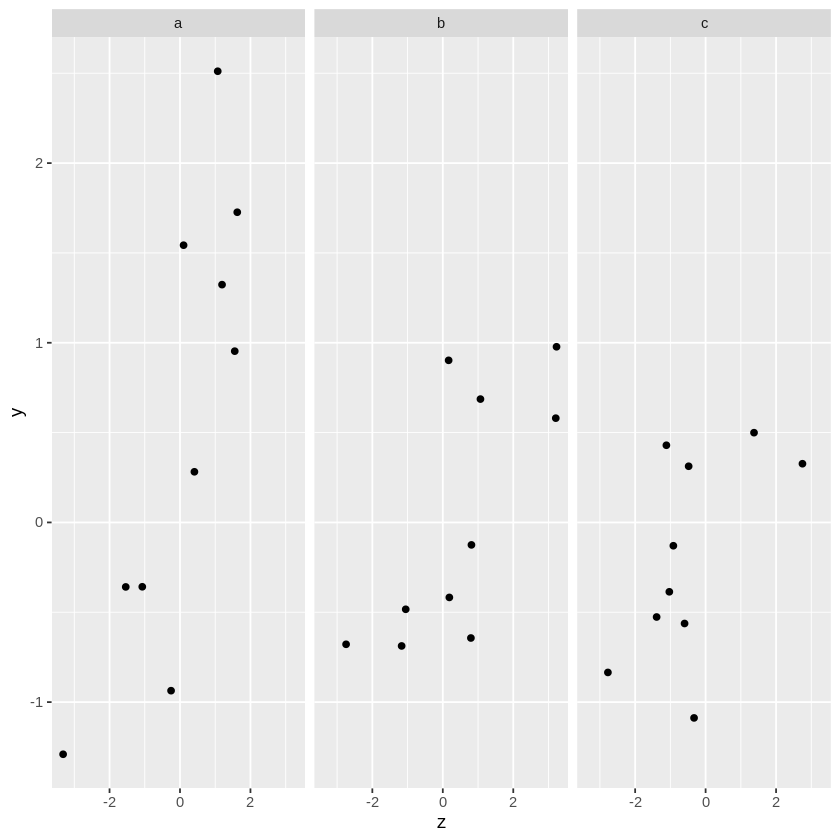

In [29]:
df$z<-df$y+rnorm(30)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



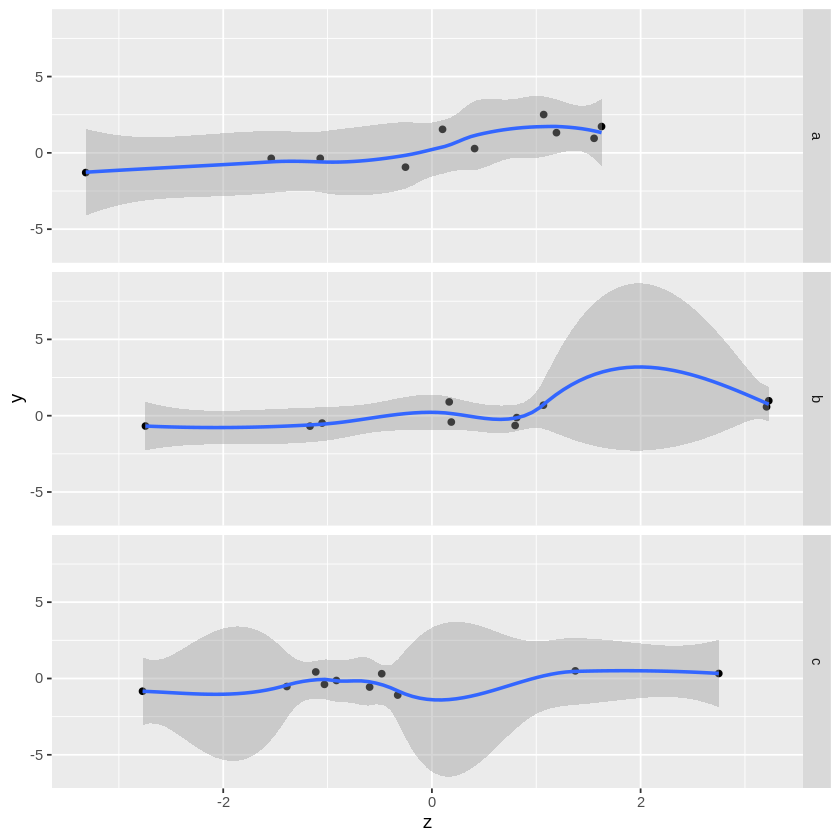

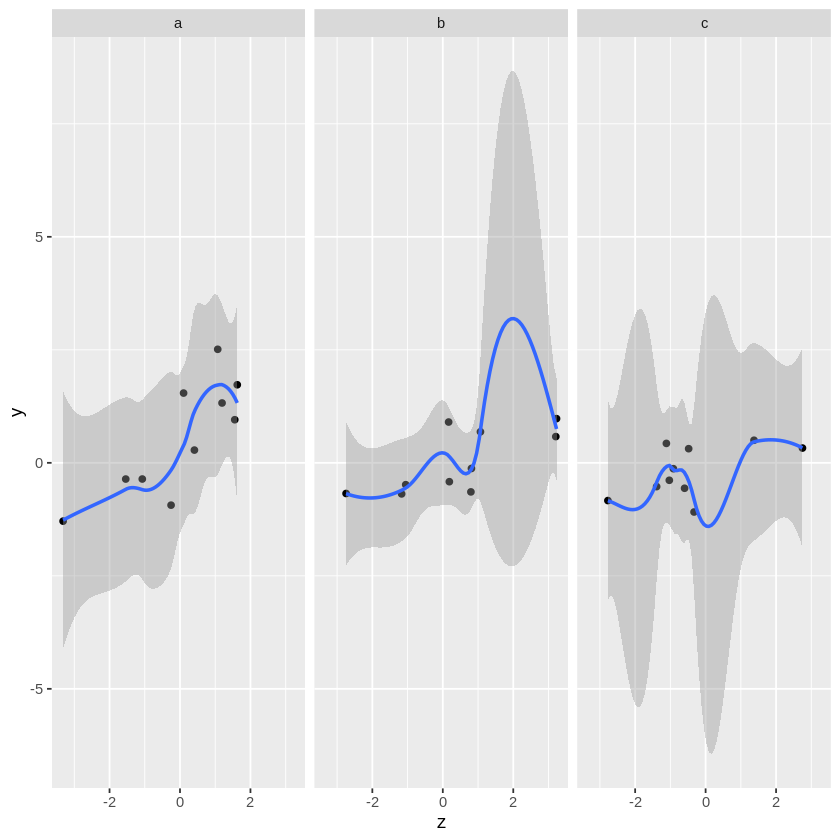

In [32]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)+geom_smooth()
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)+geom_smooth()

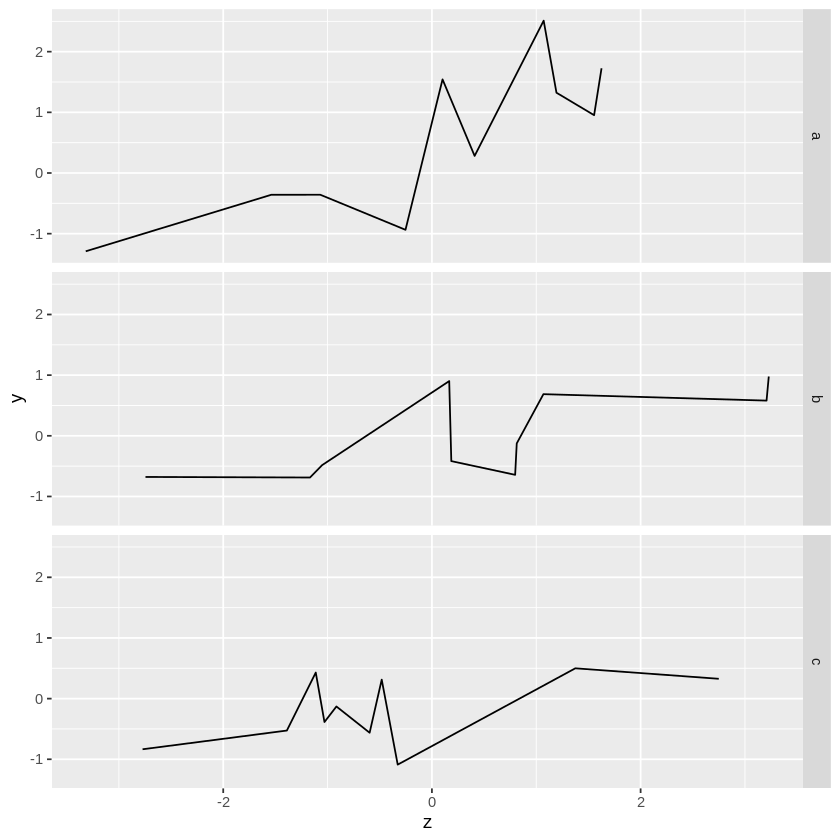

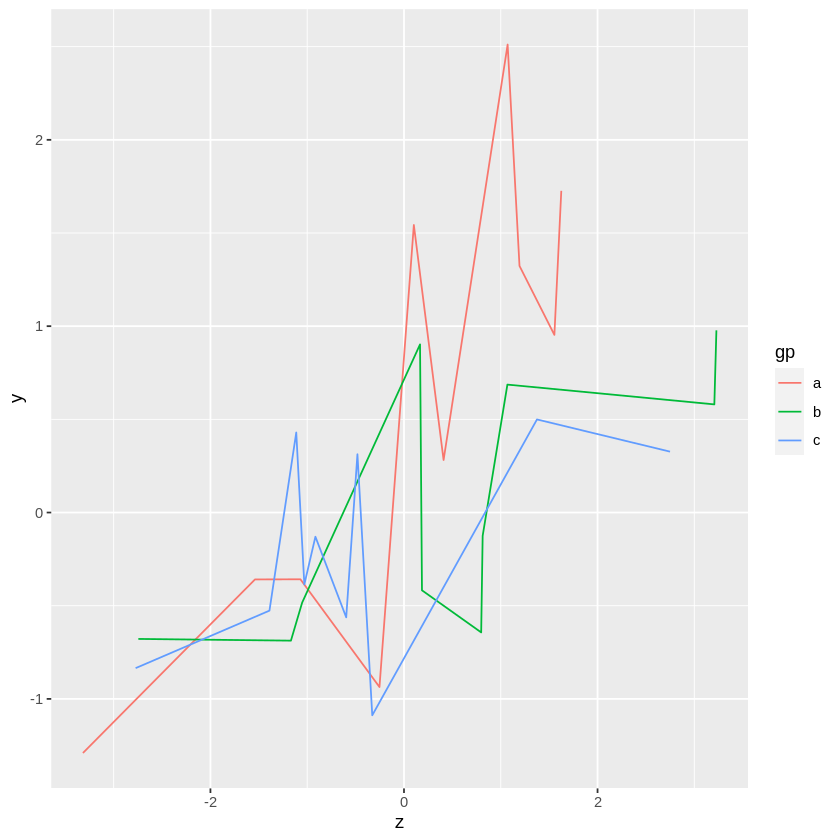

In [33]:
ggplot(df,aes(x=z,y=y))+geom_line()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y,color=gp))+geom_line()

In [34]:
install.packages("datasets")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”


In [35]:
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [37]:
library(datasets)
library(data.table)

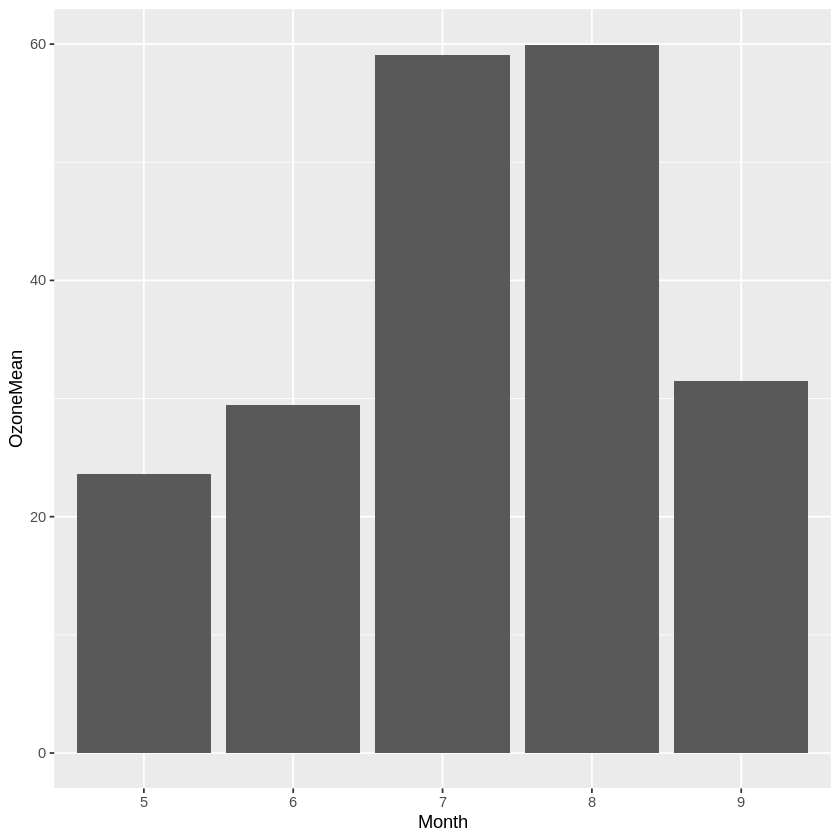

In [38]:
airquality$Month<-as.factor(airquality$Month)
airquality.mean<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T)),by=Month]
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat="identity")

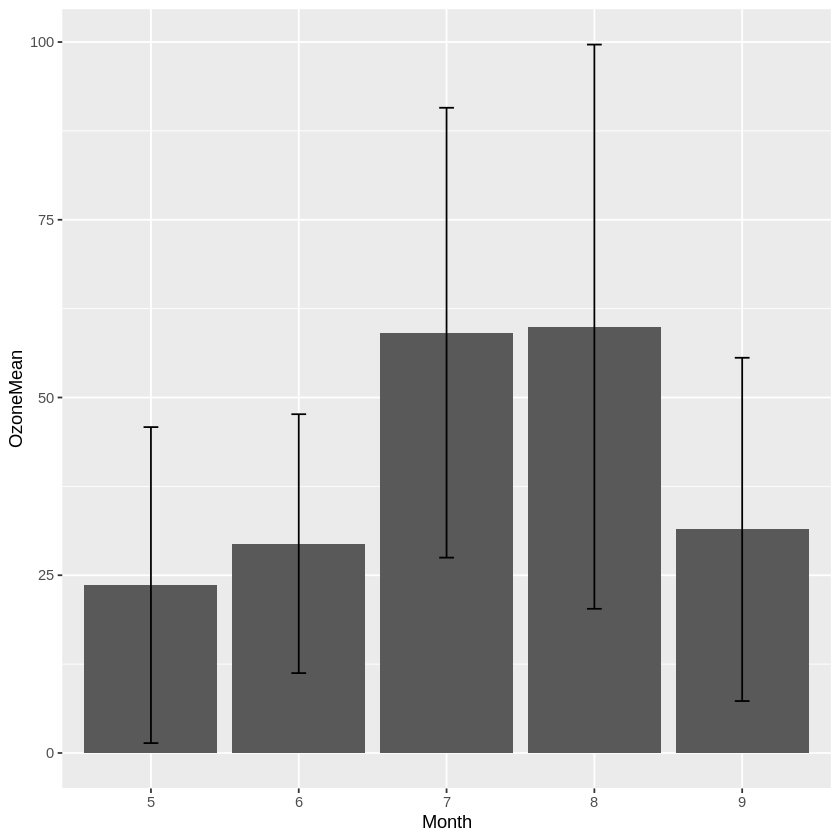

In [40]:
library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.stat<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T),OzoneSD=sd(Ozone,na.rm=T)),by=Month]
ggplot(data=airquality.stat)+geom_bar(aes(x=Month,y=OzoneMean),stat="identity")+geom_errorbar(aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width=.1)